In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

Dice Game: six sides to the dice.
equal probability of outcome for each side. prob = 1/6
we assign different value outcomes to each of each dice we get. 


In [2]:
dice_game = {
    1: 0.5,
    2: 1.05,
    3: 1.05,
    4: 1.05,
    5: 1.05,
    6: 1.5,
}

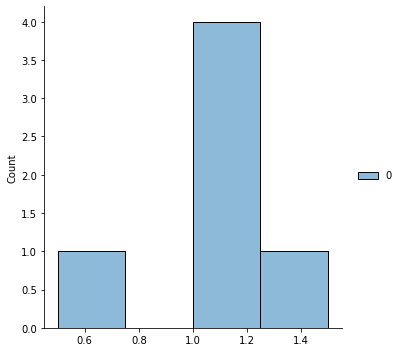

In [3]:
sns.displot(dice_game.values())
plt.show()

In [4]:
# arithmetic expectation value
np.sum(list(dice_game.values()))/len(dice_game.keys())

1.0333333333333334

In [5]:
value = 1
for i in dice_game.keys():
    value *= dice_game[i]
value

0.9116296875000002

In [6]:
res = (np.log(0.5)+np.log(1.05)+np.log(1.05)+np.log(1.05)+np.log(1.05)+np.log(1.5))/6
np.power(np.e, res)

0.9846980471114547

In [7]:
# wealth after one round of this game in the path of 1->6 is 0.911. we lost 10%
# of our wealth

In [60]:
time = 300 # simulates 300 days
no_iterations = 5000
wealth_info = np.ones((no_iterations, 1))*100 # starting wealth 100
bet_values = list(dice_game.values())

for i in range(1, time):
    values = np.random.choice(a=bet_values, size=no_iterations)
    end_wealth = np.multiply(wealth_info[:,-1], values).reshape((-1,1))
    wealth_info = np.concatenate((wealth_info, end_wealth), axis=1)


In [61]:
wealth_info.shape

(5000, 300)

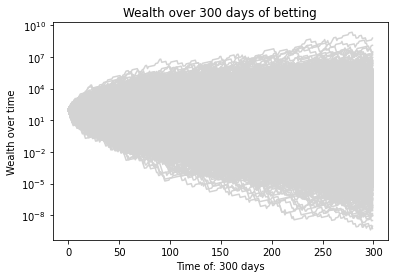

In [62]:
for i in range(wealth_info.shape[0]):
    plt.plot(wealth_info[i, :], color='lightgrey')
plt.title(f'Wealth over {time} days of betting')
plt.xlabel(f'Time of: {time} days')
plt.ylabel('Wealth over time')
plt.yscale('log')
plt.show()
# y scale is log

In [63]:
wealth_info.shape

(5000, 300)

In [166]:
np.mean(np.log(wealth_info), axis=1)

array([ 1.15952884, -6.35224608,  5.97431919, ...,  4.80990946,
       -0.68745965,  2.13349994])

/home/siddesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


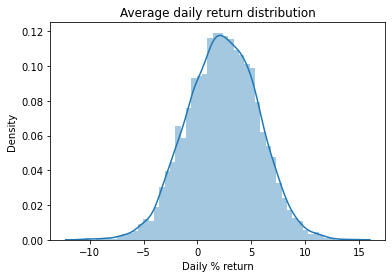

In [184]:
sns.distplot(np.mean(np.log(wealth_info), axis=1), bins=50)
plt.title('Average daily return distribution')
plt.xlabel('Daily % return')
plt.show()

In [42]:
# distribution of average return. then get the 95 and 5 percentile 
# plot with portfolio of safe haven in it. 

In [185]:
# time = 300 # simulates 300 days
# no_iterations = 1000
wealth_info = np.ones((no_iterations, 1))*100 # starting wealth 100
bet_values = list(dice_game.values())
# kelly's criterion: optimal betting strategy. 60% cash, 40% rebet
for i in range(1, time):
    values = np.random.choice(a=bet_values, size=no_iterations)
    cash_allocation = 0.6*wealth_info[:,-1]
    betting_allocation = 0.4*wealth_info[:,-1]
    end_wealth = np.multiply(betting_allocation, values)
    end_wealth += cash_allocation
    end_wealth = end_wealth.reshape((-1,1))
    wealth_info = np.concatenate((wealth_info, end_wealth), axis=1)

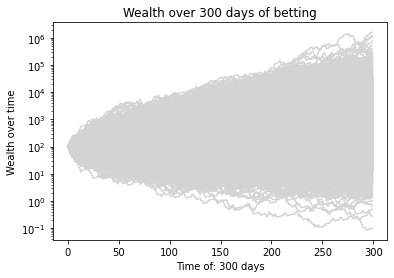

In [186]:
for i in range(wealth_info.shape[0]):
    plt.plot(wealth_info[i, :], color='lightgrey')
plt.title(f'Wealth over {time} days of betting')
plt.xlabel(f'Time of: {time} days')
plt.ylabel('Wealth over time')
plt.yscale('log')
plt.show()

as we can see here. simply by putting aside 60% of the amount and only betting 40% continously reduced the density of the distribution of the graph. this reduced the risk of us falling into the pit of losing alot of money from the 5 percentile of the distribution

kelly's optimal betting size wont be discussed here as the study focuses on the basis of this new method of risk mititgation. the optimal betting allocation can be determined by (page 81)

/home/siddesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


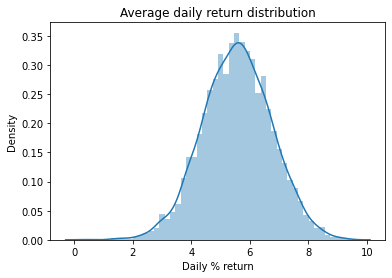

In [187]:
sns.distplot(np.mean(np.log(wealth_info), axis=1), bins=50)
plt.title('Average daily return distribution')
plt.xlabel('Daily % return')
plt.show()

the left tail of the distribution says that our average tail risk of daily return is 0%. this optimal betting strategy allowed us to mitigate the risk of heavy losses as seen in the previous distribution graph

Now, instead of keeping the money aside, we will allocate a small portion of it to save-haven insurance, which returns a multiple of 1000% when we receive one of the expected probability outcome, which is losing 50% or when our dice game returns a 6

In [ ]:
# TODO: plot for portoflio with safe-haven insurance
# distribution

kelly's criterion is still not enough and we can do better here with safe-haven